# Image processing notebook: from Transmission images to ROI-specific cross-section plots

### 00 - Introduction


### Applied processing
The following processing parts 

- Select directories of transmission images 
- display the image (average as default, but the sum is also available)
- adjust contrast, brightness, saturation, apply color LUTs to better analyze the image 
- apply zoom in a specific region (2 images side-by side, the right one has the zoom and the right one the region selected) [it displays the x,y,w,h info]
- Select several ROIs, you can manually type them too (add a string of values)
- give the names or mantain them as default (ROI_1, ROI_2, etc)
- print the image with the ROIs selected with the names
- select the graph you want to print 
- plot the cross-sections 
- have a file in excel with a pandas database with the transmission information (name of the sample 

## initial settings

### import libraries

In [68]:
import sys
sys.path.append(r'..\framework')
sys.path.append(r'..\proc_functions')
sys.path.append(r'..\utilities')
from stack_proc_func import *
from img_utils_4_transmission import *
from plot_cross_sections import *
%matplotlib inline

### provide directories

#### Provide the directory where the transmission images are saved

In [69]:
# %load select_directory('src_dir')
src_dir = r"H:\700 Campaigns - internal\780 2020\PSI20_01NI\temp\IP_Yvette_02\Transmission_results_new"

#### Provide the Spectra.txt file from any of the experiments. These are the neutron arrival times the MCP detected

In [70]:
# %load select_file('spectra_file')
spectra_file = r"H:\700 Campaigns - internal\780 2020\PSI20_01NI\arch\100_Images\100_raw\08_yvette1\01_p1\IMAT00015384_08_yvette1_01_p1_000_Spectra.txt"

#### Provide the directory where the casing transmission images are saved

In [71]:
# %load select_directory('casing_dir')
casing_dir = r"H:\700 Campaigns - internal\780 2020\PSI20_01NI\temp\IP_Yvette_02\Transmission_results_new"

In [72]:
flight_path = 56

### Select the folder where the casing transmission images are saved

In [73]:
casing_dict = prep_stack_dict(casing_dir)
for key in casing_dict.keys():
    print(key)

04_p1
06_p2
08_p3
10_p4
17_p3_lw
19_p4_lw


In [74]:
casing_folder = '08_p3'
casing_images = avg_transmission_img(casing_dict, [casing_folder], save_results = False)

Averaging:   0%|                                         | 0/1 [00:00<?, ?it/s]

save_results = False


Averaging: 100%|█████████████████████████████████| 1/1 [00:13<00:00, 13.41s/it]


#### Select the ROI which corresponds to the casing

In [75]:
# %load select_multiple_rois(casing_folder, casing_images[0], cmap='gray')
ROIs_08_p3 = [[218, 162, 207, 51]]

#### Display the average of the casing transmission Images

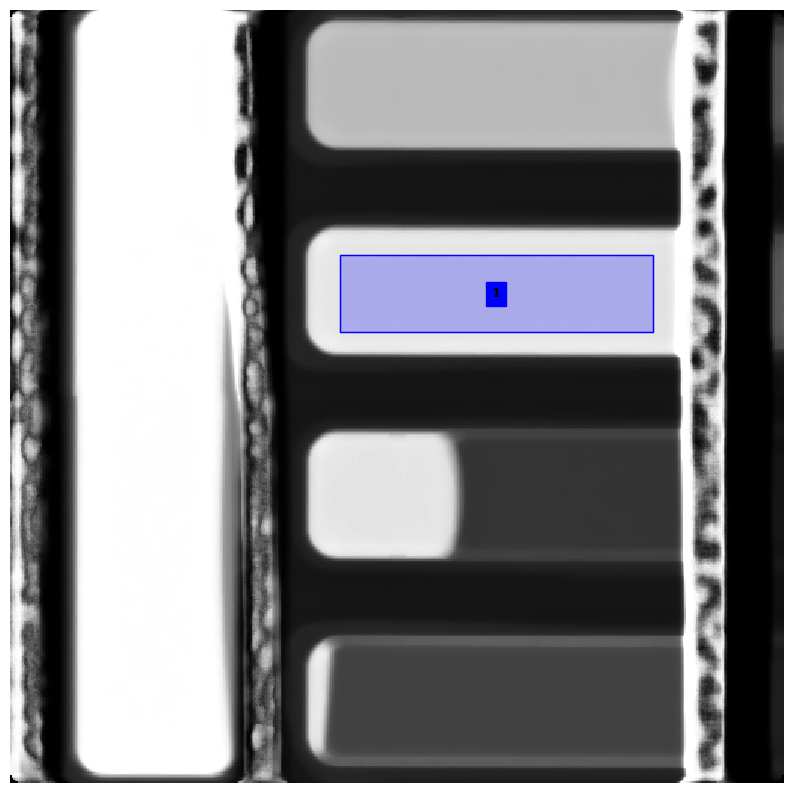

In [76]:
show_img(casing_images[0], dr = [(ROIs_08_p3, 'blue')], cmap='gray')

#### Create the dictionary with the folder contaiming the casing to process

In [77]:
rois_dict_casing = {}
for name in [casing_folder]:
    rois_name = 'ROIs_'+ name
    for rois in [rois_name]:
        rois_dict_casing[rois] = eval(rois)

#### Get the casing transmission values to include them in the process

In [78]:
raw_trans_val_casing = get_transmission_values (casing_dict, rois_dict_casing, spectra_file, src_dir=src_dir,  binning = 5, 
                                         flight_path = flight_path, start_slice=3, save_results = False,
                                         name_xlsx = 'Transmission_values_casing.xlsx')

### Select folders with the samples to process

In [79]:
imgs_dict = prep_stack_dict(src_dir)
for key in imgs_dict.keys():
    print(key)

04_p1
06_p2
08_p3
10_p4
17_p3_lw
19_p4_lw


#### add the folders you are interested in 

In [81]:
#proc_folder1 = [key for key in imgs_dict.keys() if 'batch01' in key]
#proc_folder2 = [key for key in imgs_dict.keys() if 'batch02' in key]
#proc_folder3 = [key for key in imgs_dict.keys() if 'batch03' in key]
proc_folder = ['08_p3']

In [82]:
imgs_dict = prep_stack_dict(src_dir)
avg_images = avg_transmission_img(imgs_dict, proc_folder, save_results = False)

Averaging:   0%|                                         | 0/1 [00:00<?, ?it/s]

save_results = False


Averaging: 100%|█████████████████████████████████| 1/1 [00:10<00:00, 10.33s/it]


to use effectively the magic of %load, the selection of ROIs is required to be done separately per image. In this way we save the ROIs selected for the documentation 

no need to specify the processing folders again because the functions before, remove the "undesire" folders from the dictionary

In [86]:
# %load select_multiple_rois(proc_folder[0], avg_images[0], cmap = 'gray')
ROIs_08_p3 = [[226, 431, 205, 51], [313, 296, 117, 51]]

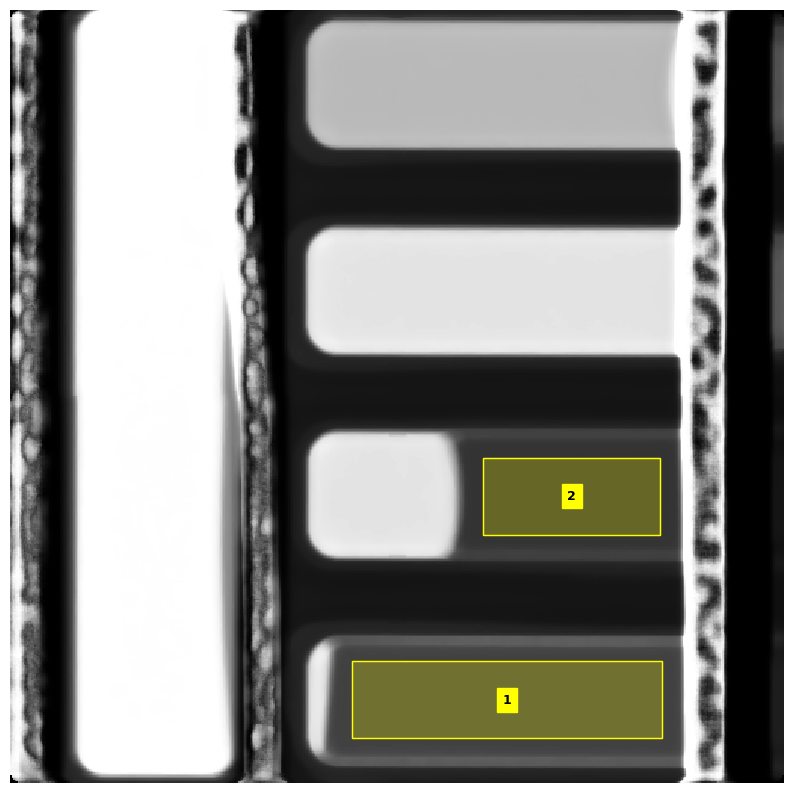

In [88]:
show_img(avg_images[0], dr = [(ROIs_08_p3, 'yellow')], cmap='gray')

In [57]:
# %load select_multiple_rois(proc_folder[1], avg_images[1],cmap='flag')
ROIs_06_p2 = [[229, 26, 186, 51]]

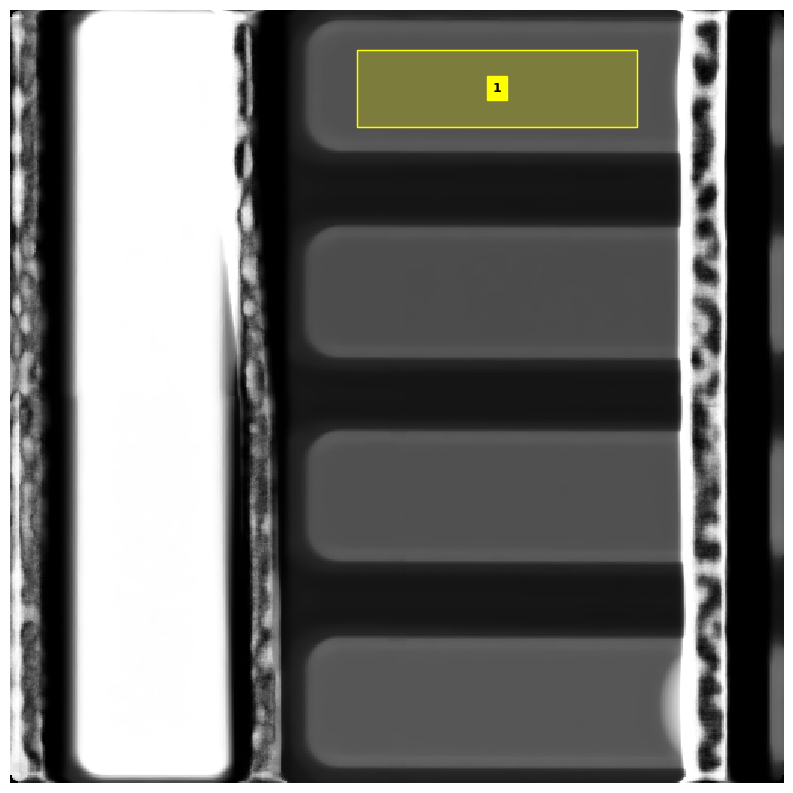

In [58]:
show_img(avg_images[1], dr = [(ROIs_06_p2, 'yellow')], cmap='gray')

In [59]:
# %load select_multiple_rois(proc_folder[2], avg_images[2],cmap='flag')
ROIs_08_p3 = [[216, 432, 206, 51], [263, 296, 142, 51], [216, 161, 214, 51], [218, 25, 201, 51]]

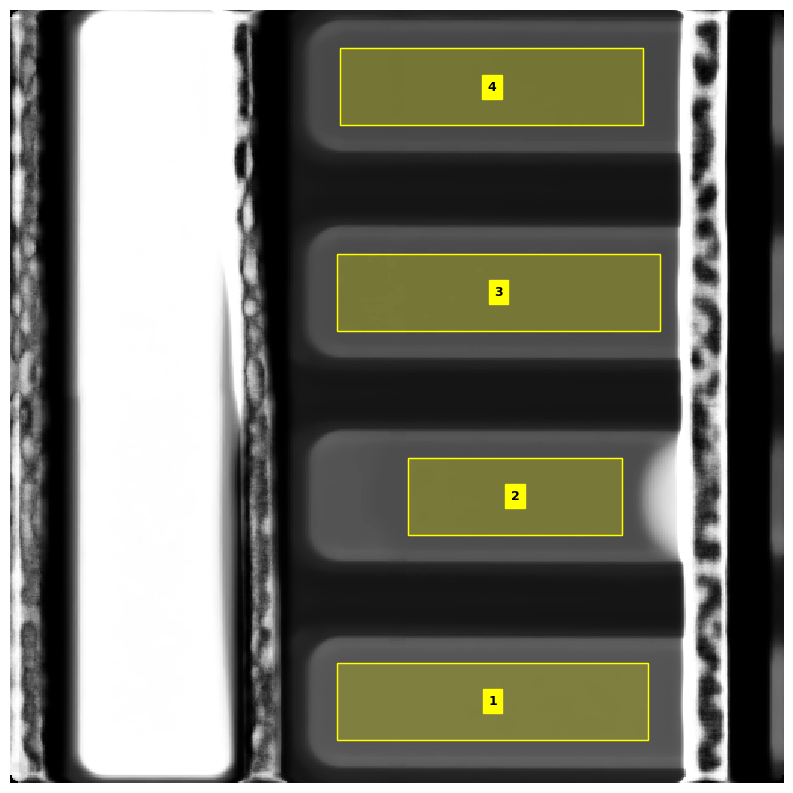

In [60]:
show_img(avg_images[2], dr = [(ROIs_08_p3, 'yellow')], cmap='gray')

Because (for documentation reasons) the ROIs were selected separately. A dictionary is automatic created containing all the ROIs that were selected 

the automatic process is the following:

new_dict = {}
for folder,image in zip(proc_folder,avg_images):
    new_dict[folder] =select_multiple_rois(folder, image, just_rois=True)
    show_img(image, dr = [(new_dict.get(folder), 'yellow')], cmap='flag')
    
%load keep_roi_values_dict(new_dict)

However, it does not fit the documentation purpose and can only be used if you are sure the ROIs will never change

In [90]:
rois_dict = {}
for name in proc_folder:
    rois_name = 'ROIs_'+ name
    for rois in [rois_name]:
        rois_dict[rois] = eval(rois)

When you selected the folders you wanted to process, the program got rid of usless information. For this reason, the original dictionary "imgs_dict" will contain only the selcted folders and can be used directly in the next function

In [91]:
raw_trans_val = get_transmission_values (imgs_dict, rois_dict, spectra_file, src_dir=src_dir,  binning = 5, 
                                         flight_path = flight_path, start_slice=3, save_results = False,
                                         name_xlsx = 'Transmission_values.xlsx')

In [92]:
print(raw_trans_val)

    Wavelength [Å]  raw_trans_08_p3_roi_1  raw_trans_08_p3_roi_2
0         0.764306               0.520424               0.445944
1         0.822177               0.507337               0.437852
2         0.880048               0.492648               0.429242
3         0.937919               0.476708               0.420398
4         0.995790               0.462262               0.411889
..             ...                    ...                    ...
86        6.309072               0.169486               0.113518
87        6.366943               0.167842               0.112235
88        6.424814               0.166882               0.111090
89        6.482685               0.166045               0.110347
90        6.540556               0.164381               0.109265

[91 rows x 3 columns]


In [97]:
h2o = {'abbv': 'H2O','composition' : {'H':2.0, 'O':1.0},'density':0.997, 'thickness': 0.3}
ec = {'abbv': 'EC', 'composition' : {'C':3.0, 'H':4.0, 'O':3.0},'density':1.32, 'thickness': 0.3}
dmc = {'abbv': 'DMC','composition' : {'C':3.0, 'H':6.0, 'O':3.0}, 'density':1.07, 'thickness': 0.3}
dec = {'abbv': 'DEC','composition' : {'C':5.0, 'H':10.0, 'O':3.0}, 'density':0.975, 'thickness': 0.3}
lipf6 = {'abbv': 'LiPF6','composition' : {'LI':1.0, 'P':1.0, 'F':6.0}, 'density':1.5, 'thickness': 0.3}
ec_dmc_11v = {'abbv': 'EC_DMC (1:1v)','molecules' : [ec,0.5,dmc,0.5], 'density':1.28, 'thickness': 0.3 }
ec_dmc_11w = {'abbv': 'EC_DMC (1:1w)','molecules' : [ec,0.447511501,dmc,0.552488499], 'density':1.2335, 'thickness': 0.3 }
ec_dec_11v = {'abbv': 'EC_DEC (1:1v)','molecules' : [ec,0.5,dec,0.5], 'density':1.1785, 'thickness': 0.3 }
ec_dec_37w = {'abbv': 'EC_DEC (3:7w)','molecules' : [ec,0.240305619,dec,0.759694381], 'density':1.0705, 'thickness': 0.3 }
lp30 = {'abbv': 'LP30','molecules' : [ec, 0.406359477,dmc, 0.501683056, lipf6, 0.091957467], 'density':1.2795, 'thickness': 0.3}
lp40 = {'abbv': 'LP40','molecules' : [ec, 0.447925137,dec, 0.447925137, lipf6, 0.104149725], 'density':1.2635, 'thickness': 0.3}
lp47 = {'abbv': 'LP47','molecules' : [ec, 0.218207723,dec, 0.689834809, lipf6 ,0.091957467], 'density':1.1685, 'thickness': 0.3}
ec_dec_sol = {'abbv': 'EC_DEC (sol)','molecules' : [ec,0.5,dec,0.5], 'density':1.1785, 'thickness': 0.3 }
pe = {'abbv': 'PE', 'composition' : {'C':1.0, 'H':2.0},'density':0.92, 'thickness': 0.201}

In [98]:
#compounds_dict = [lp30,lp40,lp47,ec,ec_dmc_11v,ec_dec_11v, ec_dec_37w,dmc,dec,pe,h2o]
compounds_dict=[pe,h2o]

Function to get the cross sections, the requested_cs is a list of the desired cross-sections oprions are ['total_cs','h_cs','lli_cs']


In [100]:
requested_cs = ['h_cs']
cs_table = get_cross_sections (raw_trans_val, raw_trans_val_casing, compounds_dict, requested_cs , 
                               dst_dir = src_dir, save_table = True, name_xlsx = 'IMAT_yvette2_CS_results.xlsx')

In [101]:
print(cs_table)

    Wavelength [Å]  CS_H_in_PE  CS_H_in_H2O
0         0.764306   31.873598    33.020970
1         0.822177   33.648802    34.073249
2         0.880048   35.682505    35.212681
3         0.937919   37.625847    36.152851
4         0.995790   39.733256    37.310534
..             ...         ...          ...
86        6.309072  100.897225   100.352749
87        6.366943  101.501111   100.915968
88        6.424814  101.700077   101.302751
89        6.482685  101.944984   101.584069
90        6.540556  102.453230   101.980226

[91 rows x 3 columns]
